## Import Libararies 

In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Connect to the Database

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-V1GJFET;'
    'DATABASE=Shopping_Trends;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df = df.drop(columns=['Customer_ID',"Color"])


## Exploratory Data Analysis (EDA)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item_Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase_Amount_USD       3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Season                    3900 non-null   object 
 8   Review_Rating             3900 non-null   float64
 9   Subscription_Status       3900 non-null   object 
 10  Payment_Method            3900 non-null   object 
 11  Shipping_Type             3900 non-null   object 
 12  Discount_Applied          3900 non-null   object 
 13  Promo_Code_Used           3900 non-null   object 
 14  Previous

In [7]:
df.describe()


,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [8]:
df.isnull().sum()


Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [9]:
df.nunique()


Age                         53
Gender                       2
Item_Purchased              25
Category                     4
Purchase_Amount_USD         81
Location                    50
Size                         4
Season                       4
Review_Rating               26
Subscription_Status          2
Payment_Method               6
Shipping_Type                6
Discount_Applied             2
Promo_Code_Used              2
Previous_Purchases          50
Preferred_Payment_Method     6
Frequency_of_Purchases       7
dtype: int64

In [10]:
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].str.strip().str.title()


In [11]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\n🔹 {col} - Unique values:")
    print(df[col].value_counts(dropna=False))



🔹 Gender - Unique values:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

🔹 Item_Purchased - Unique values:
Item_Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-Shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

🔹 Category - Unique values:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

🔹 Location - Unique values:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware     

In [12]:
df['Size'] = df['Size'].replace({'Xl': 'XL'})


In [13]:
df['Review_Rating'].unique()


array([3.0999999 , 3.5       , 2.70000005, 2.9000001 , 3.20000005,
       2.5999999 , 4.80000019, 4.0999999 , 4.9000001 , 4.5       ,
       4.69999981, 2.79999995, 4.5999999 , 3.29999995, 4.4000001 ,
       3.5999999 , 5.        , 4.        , 3.70000005, 4.19999981,
       3.9000001 , 3.        , 3.79999995, 3.4000001 , 4.30000019,
       2.5       ])

In [14]:
df['Review_Rating'] = df['Review_Rating'].round(1)


## Check Outlier

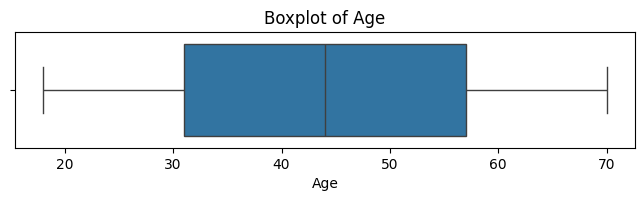

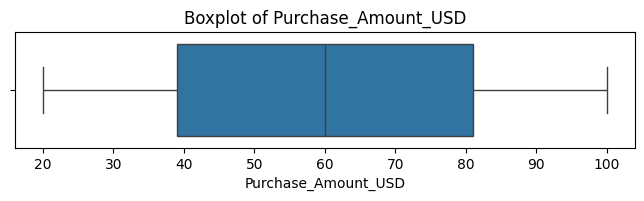

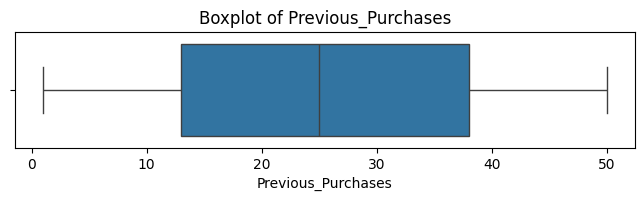

In [15]:


for col in ['Age', 'Purchase_Amount_USD', 'Previous_Purchases']:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [16]:

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\n Outliers in '{column}':")
    print(f"- Lower bound: {lower_bound}")
    print(f"- Upper bound: {upper_bound}")
    print(f"- Number of outliers: {outliers.shape[0]}")
    return outliers

outliers_age = detect_outliers('Age')
outliers_purchase = detect_outliers('Purchase_Amount_USD')
outliers_previous = detect_outliers('Previous_Purchases')



 Outliers in 'Age':
- Lower bound: -8.0
- Upper bound: 96.0
- Number of outliers: 0

 Outliers in 'Purchase_Amount_USD':
- Lower bound: -24.0
- Upper bound: 144.0
- Number of outliers: 0

 Outliers in 'Previous_Purchases':
- Lower bound: -24.5
- Upper bound: 75.5
- Number of outliers: 0


### Create  Age_Category Column

In [17]:
def age_category(age):
    if 18<= age <= 25:
        return "Youth"
    elif 26 <= age <= 35:
        return "Young Adult"    
    elif 36 <= age <= 45:
        return "Adult"
    elif 46 <= age <= 55:
        return "Middle Aged"    
    elif 56 <= age <= 70:
        return "Senior"
df['Age_Category'] = df['Age'].apply(age_category)    

In [18]:
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Age_Category
0,55,Male,Blouse,Clothing,53,Kentucky,L,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,19,Male,Sweater,Clothing,64,Maine,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Youth
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Spring,3.5,Yes,Paypal,Next Day Air,Yes,Yes,49,Paypal,Weekly,Youth
4,45,Male,Blouse,Clothing,49,Oregon,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,Paypal,Annually,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,Adult
3896,52,Female,Backpack,Accessories,49,Iowa,L,Spring,4.5,No,Paypal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Middle Aged
3897,46,Female,Belt,Accessories,33,New Jersey,L,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,Middle Aged
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Summer,3.8,No,Paypal,Express,No,No,24,Venmo,Weekly,Adult


### Age Distribution

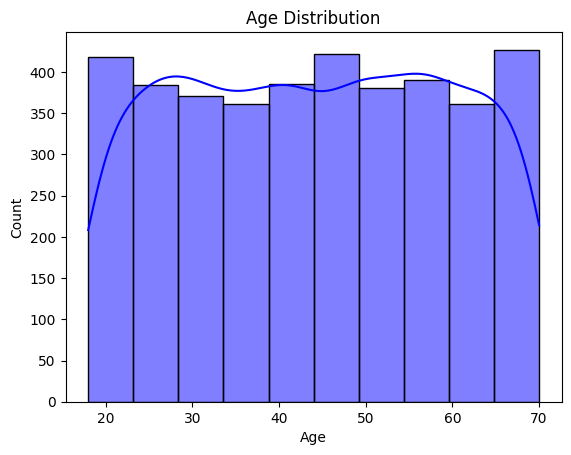

In [19]:


sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Customer Distribution by Gender 

        Count  Percentage (%)
Gender                       
Male     2652            68.0
Female   1248            32.0


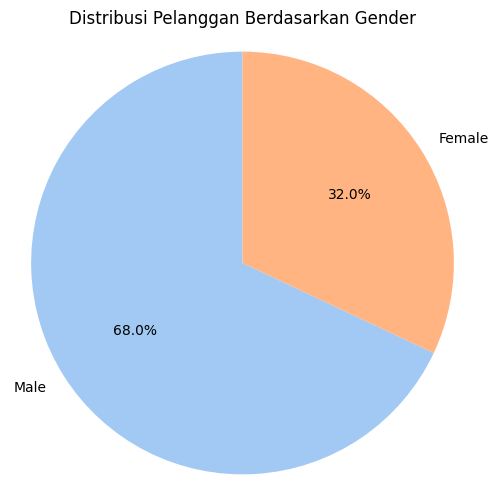

In [20]:
gender_counts = df['Gender'].value_counts()
gender_percentages = df['Gender'].value_counts(normalize=True)*100
summary = pd.DataFrame({'Count': gender_counts, 'Percentage (%)': gender_percentages.round(2)})
print(summary)

plt.figure(figsize=(6, 6))

plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')) 

plt.title('Distribusi Pelanggan Berdasarkan Gender') 
plt.axis('equal')
plt.show()

### Age Distribution by Gende

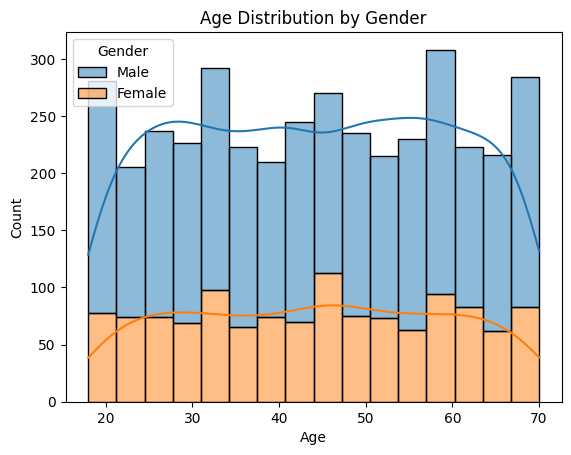

In [21]:
sns.histplot(data=df, x='Age', hue='Gender', kde=True, multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [22]:
df['Item_Purchased'].unique()



array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-Shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

## Top 10 Most Purchased Items 

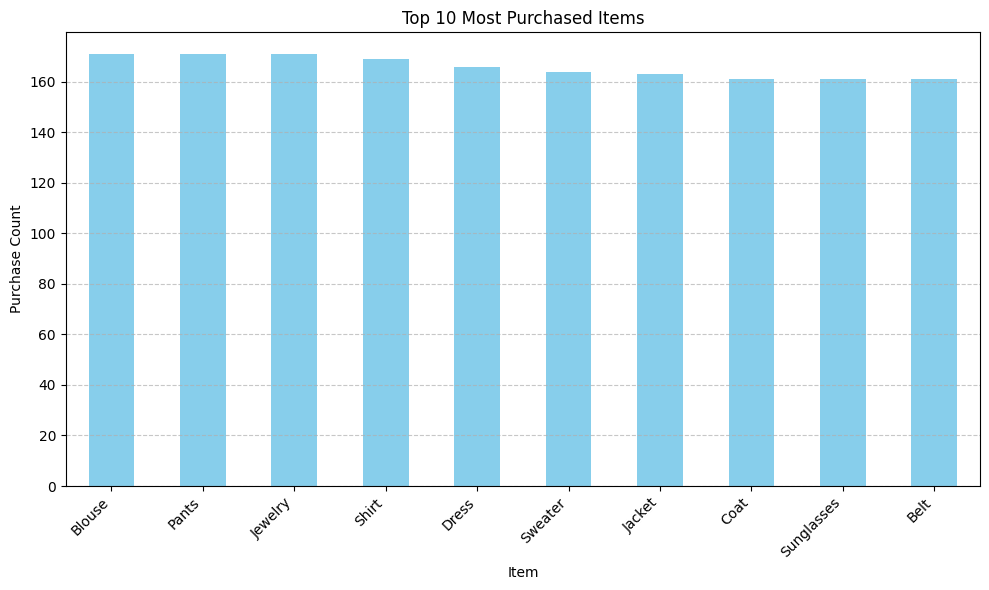

In [23]:
top_items = df['Item_Purchased'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top Items per Category — Aggregated Counts Table

In [24]:
top_items_per_category = df.groupby(['Category', 'Item_Purchased']).size().reset_index(name='Count')
top_items_per_category


,Category,Item_Purchased,Count
0,Accessories,Backpack,143
1,Accessories,Belt,161
2,Accessories,Gloves,140
3,Accessories,Handbag,153
4,Accessories,Hat,154
5,Accessories,Jewelry,171
6,Accessories,Scarf,157
7,Accessories,Sunglasses,161
8,Clothing,Blouse,171
9,Clothing,Dress,166


## Top 5 Items Purchased in Each Category 

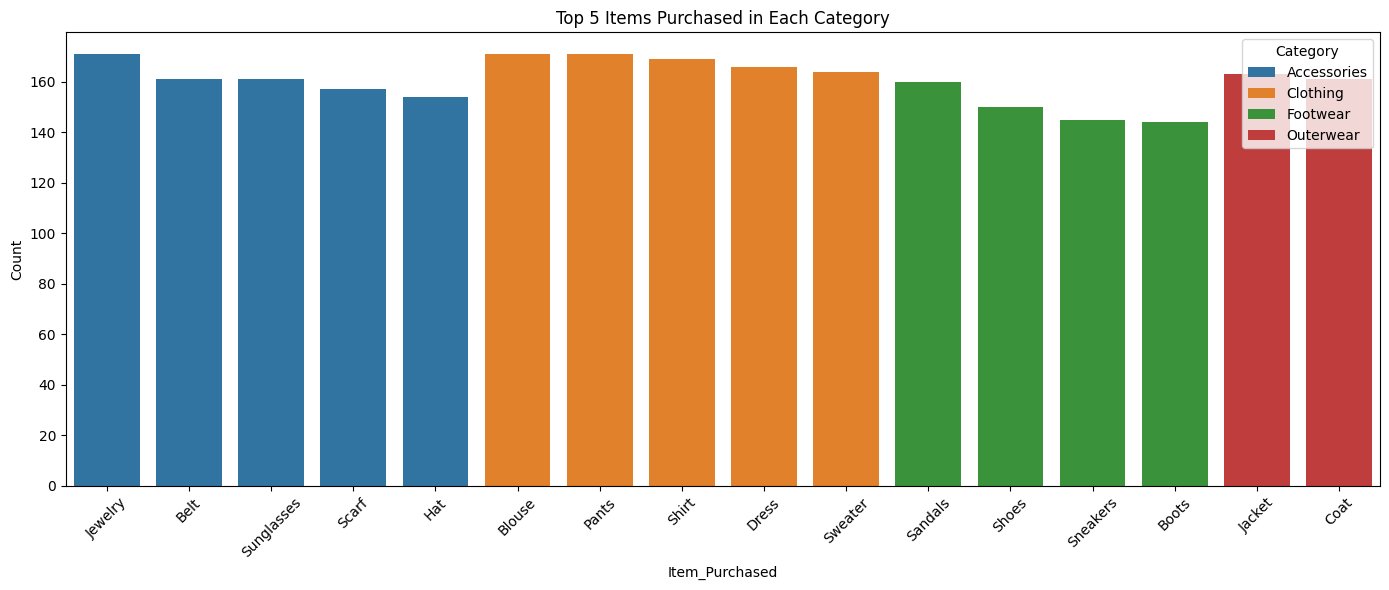

In [25]:

top_items = (
    df.groupby(['Category', 'Item_Purchased'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Category', 'Count'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_items, x='Item_Purchased', y='Count', hue='Category')
plt.xticks(rotation=45)
plt.title('Top 5 Items Purchased in Each Category')
plt.tight_layout()
plt.show()



## Total Revenue per Item in Each Category 

In [26]:
revenue_per_item = (
    df.groupby(['Category', 'Item_Purchased'])['Purchase_Amount_USD']
    .sum()
    .reset_index(name='Total_Revenue')
)
revenue_per_item

,Category,Item_Purchased,Total_Revenue
0,Accessories,Backpack,8636
1,Accessories,Belt,9635
2,Accessories,Gloves,8477
3,Accessories,Handbag,8857
4,Accessories,Hat,9375
5,Accessories,Jewelry,10010
6,Accessories,Scarf,9561
7,Accessories,Sunglasses,9649
8,Clothing,Blouse,10410
9,Clothing,Dress,10320


## Top 5 Items by Total Revenue in Each Category

In [27]:
top_revenue_items = (
    revenue_per_item
    .sort_values(['Category', 'Total_Revenue'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)


In [28]:
top_revenue_items

,Category,Item_Purchased,Total_Revenue
5,Accessories,Jewelry,10010
7,Accessories,Sunglasses,9649
1,Accessories,Belt,9635
6,Accessories,Scarf,9561
4,Accessories,Hat,9375
8,Clothing,Blouse,10410
13,Clothing,Shirt,10332
9,Clothing,Dress,10320
12,Clothing,Pants,10090
17,Clothing,Sweater,9462


## Top 5 Items by Revenue in Each Category

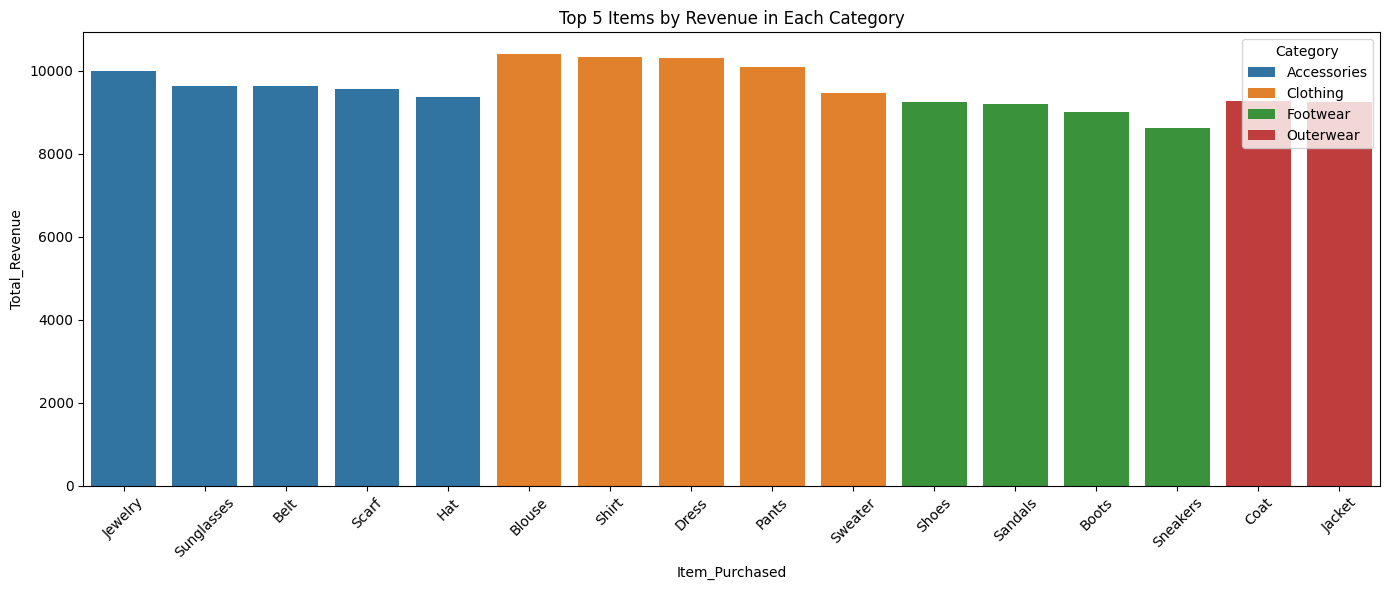

In [29]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top_revenue_items, x='Item_Purchased', y='Total_Revenue', hue='Category')
plt.title('Top 5 Items by Revenue in Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 5 Items per Category by Revenue 

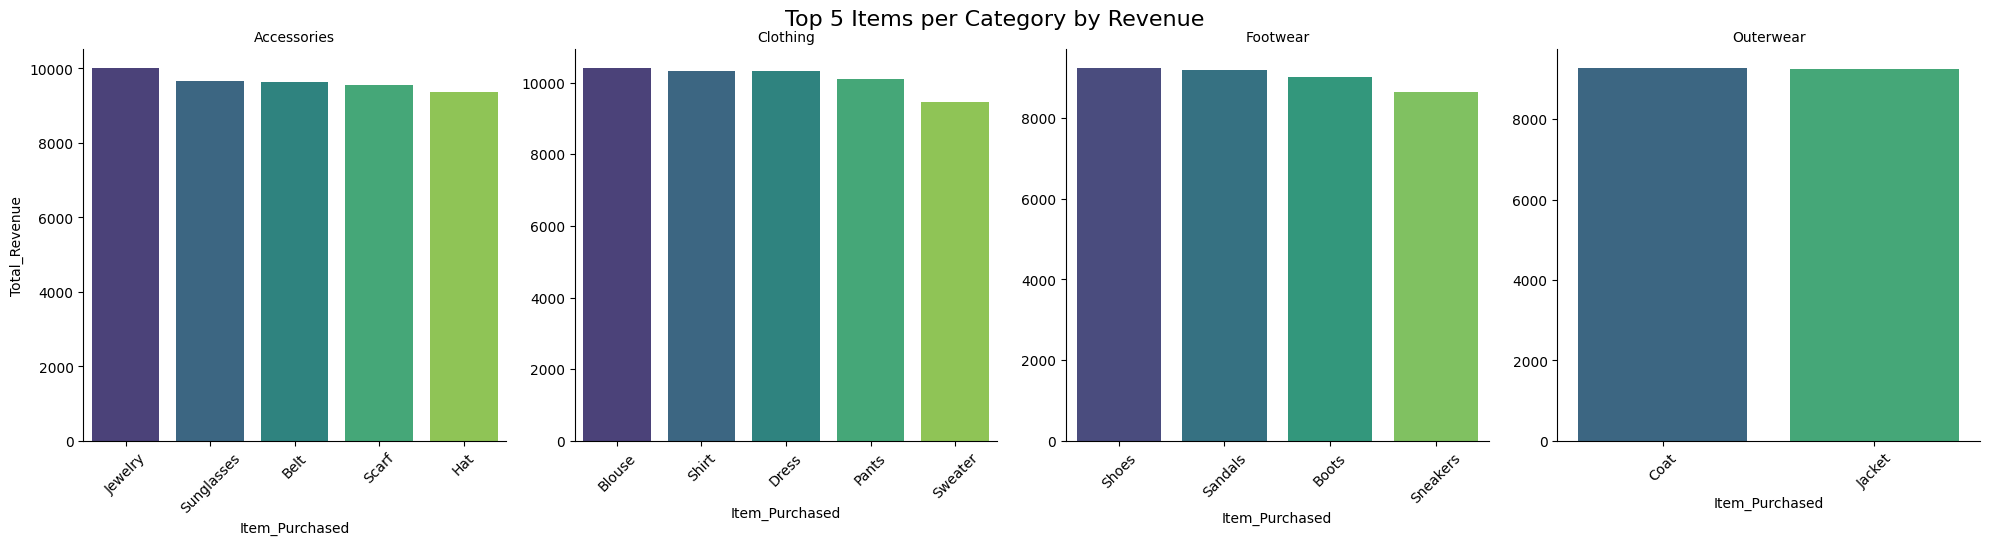

In [30]:
item = sns.FacetGrid(top_revenue_items, col='Category', col_wrap=4, sharex=False, sharey=False, height=5)
item.map_dataframe(sns.barplot, x='Item_Purchased', y='Total_Revenue', palette='viridis')
item.set_titles(col_template="{col_name}")
item.set_xticklabels(rotation=45)
item.fig.subplots_adjust(top=0.9)
item.fig.suptitle('Top 5 Items per Category by Revenue', fontsize=16)
plt.show()


## Average Purchase Amount by Category and Gender

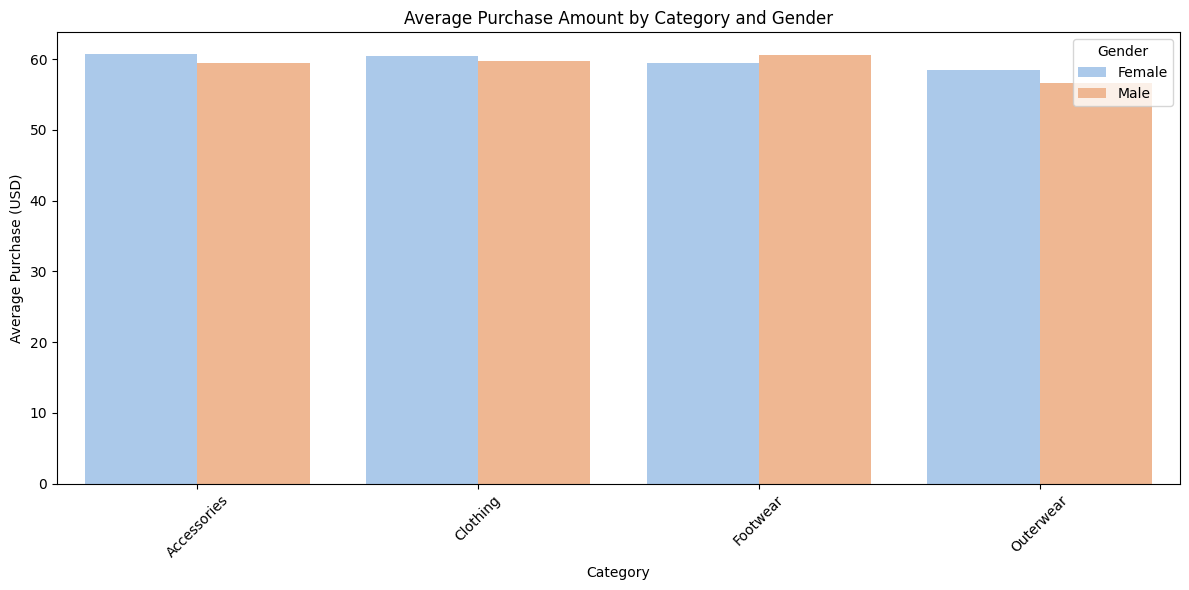

In [31]:

grouped_data = df.groupby(['Category', 'Gender'])['Purchase_Amount_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Category', y='Purchase_Amount_USD', hue='Gender', palette='pastel')
plt.title('Average Purchase Amount by Category and Gender')
plt.ylabel('Average Purchase (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 Locations by Number of Purchases 

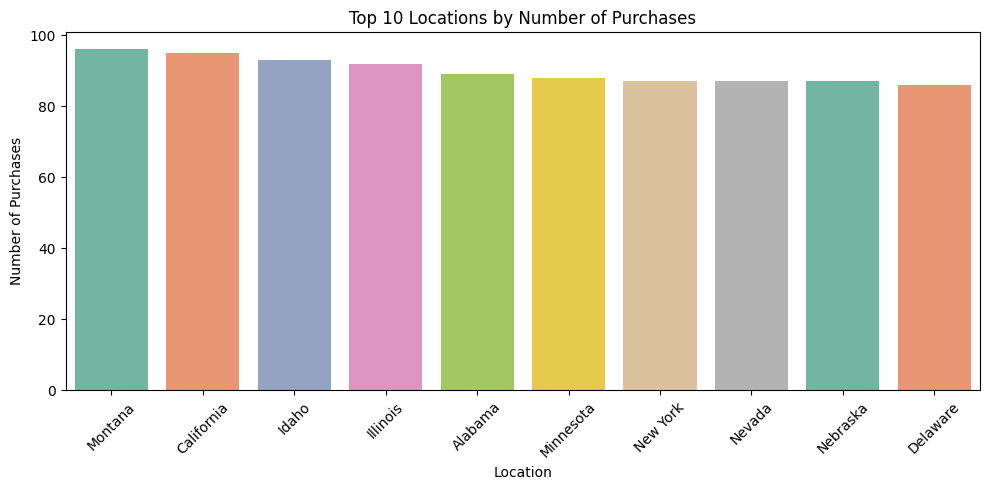

In [32]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="Set2")
plt.xticks(rotation=45)
plt.title('Top 10 Locations by Number of Purchases')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()



## Number of Purchases per Season 

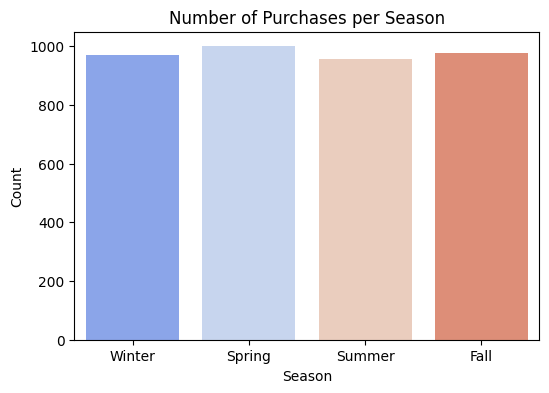

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Season', data=df, palette='coolwarm')
plt.title('Number of Purchases per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


## Top 10 Locations — Purchases by Season

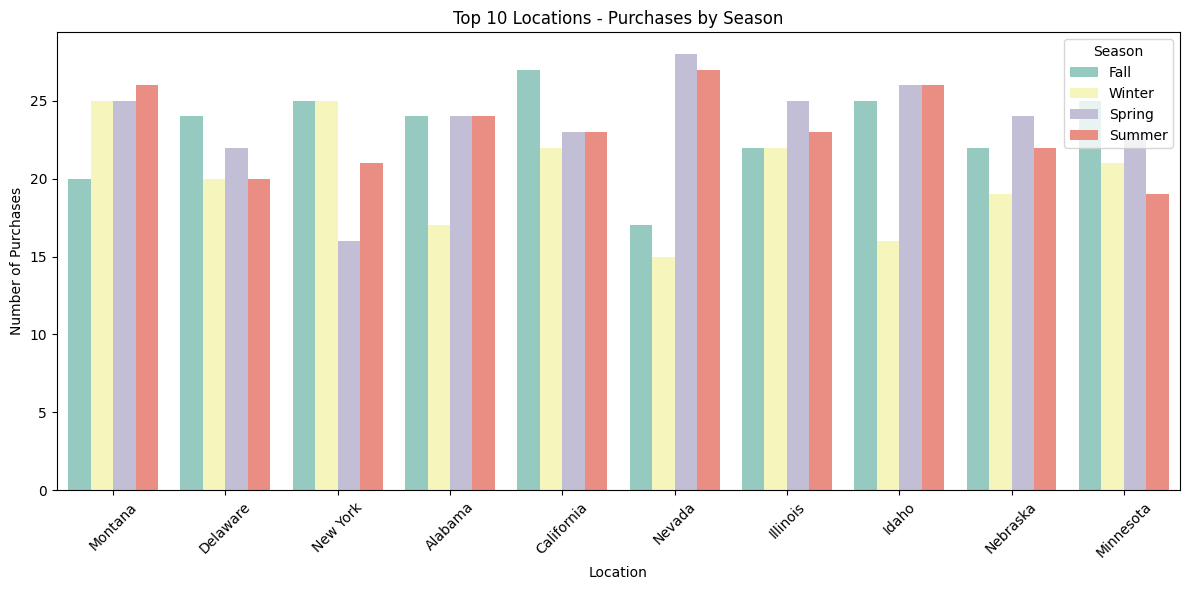

In [34]:
top_10_locs = df['Location'].value_counts().head(10).index
filtered_df = df[df['Location'].isin(top_10_locs)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Location', hue='Season', palette='Set3')
plt.title('Top 10 Locations - Purchases by Season')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Subscription Status Distribution

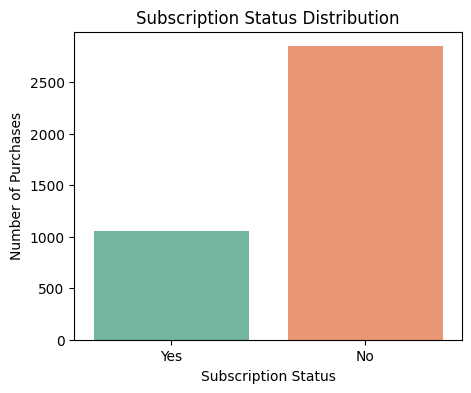

In [35]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Subscription_Status', data=df, palette='Set2')
plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Purchases')
plt.show()


## Payment Method Distribution

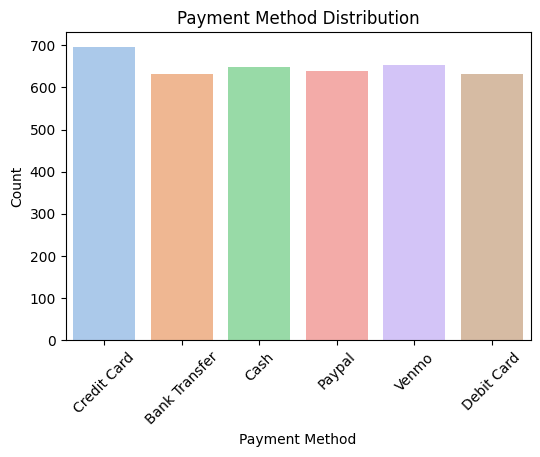

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Payment_Method', data=df, palette='pastel')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Shipping Type Distribution

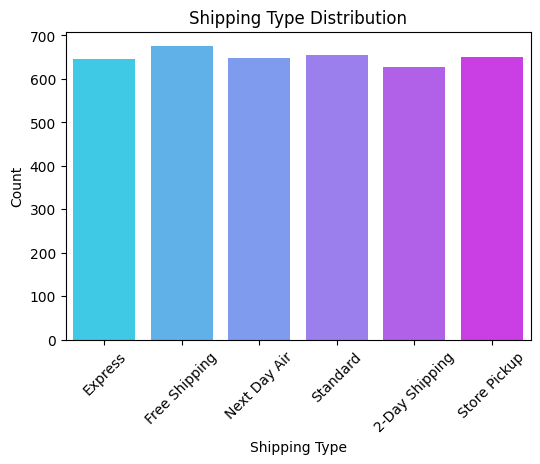

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Shipping_Type', data=df, palette='cool')
plt.title('Shipping Type Distribution')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Discount Applied Distribution


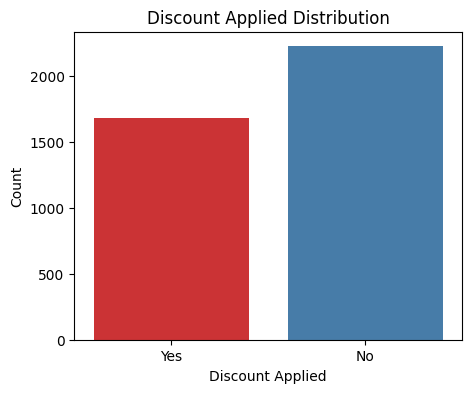

In [38]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Discount_Applied', data=df, palette='Set1')
plt.title('Discount Applied Distribution')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()


## Discount Application by Subscription Status

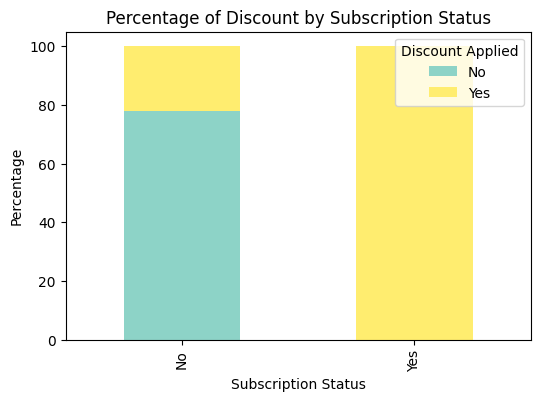

In [39]:
cross_tab = pd.crosstab(df['Subscription_Status'], df['Discount_Applied'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, colormap='Set3', figsize=(6, 4))
plt.title('Percentage of Discount by Subscription Status')
plt.ylabel('Percentage')
plt.xlabel('Subscription Status')
plt.legend(title='Discount Applied')
plt.show()


## Subscription, Payment, Shipping, and Discount

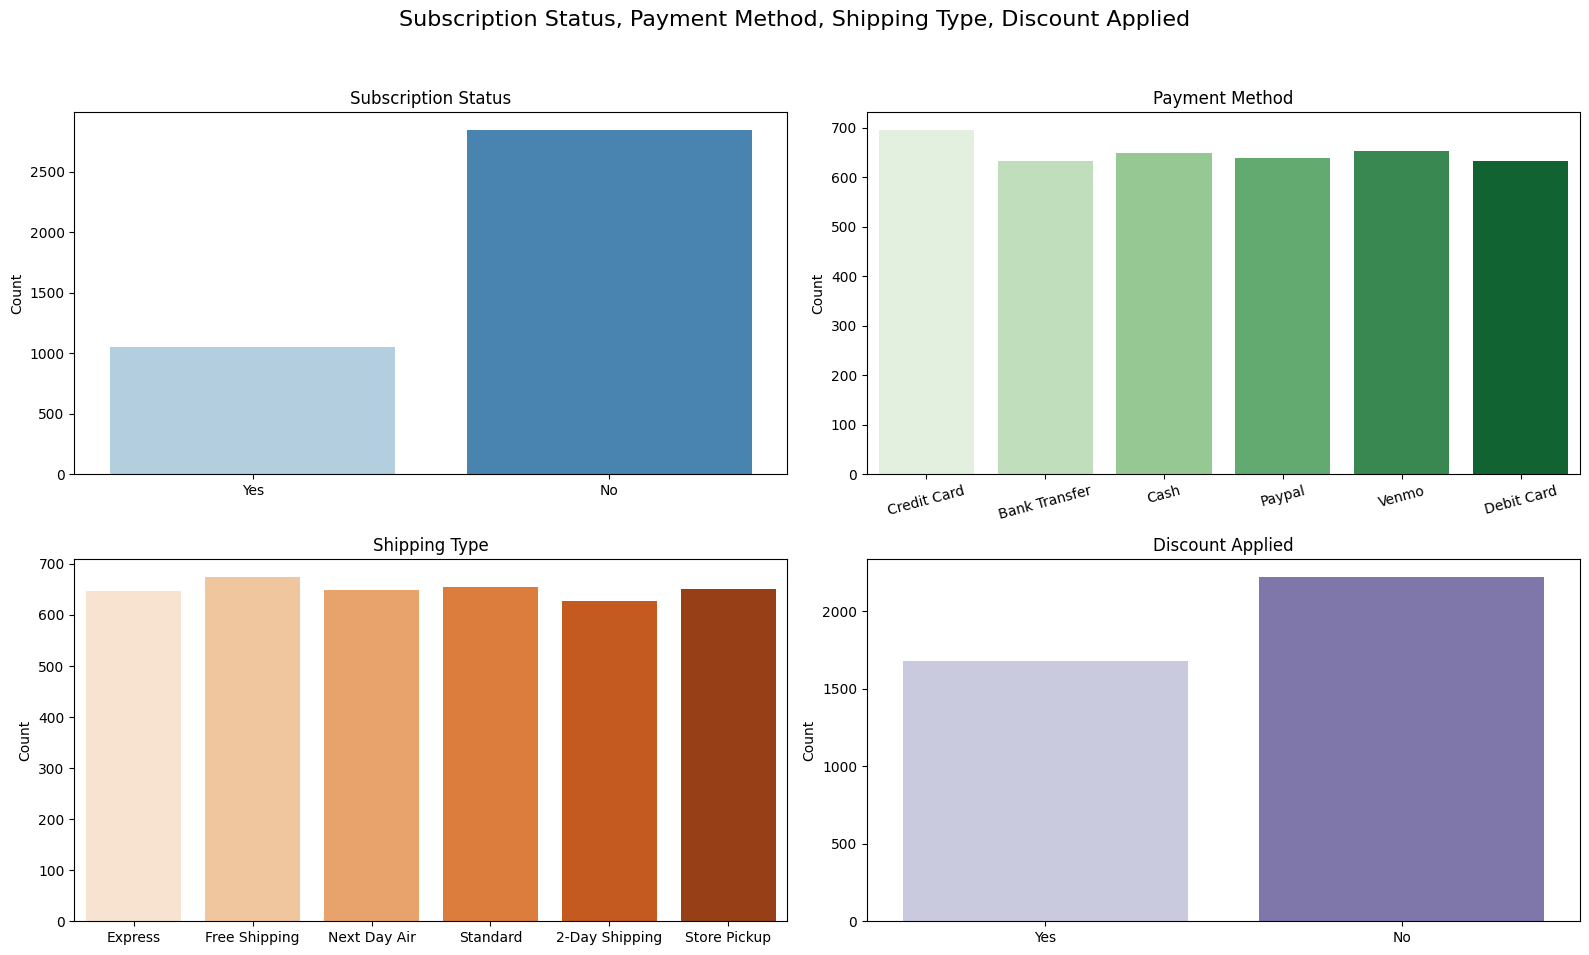

In [40]:

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Subscription Status, Payment Method, Shipping Type, Discount Applied", fontsize=16)

sns.countplot(x='Subscription_Status', data=df, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Subscription Status')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='Payment_Method', data=df, ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Payment Method')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=15)

sns.countplot(x='Shipping_Type', data=df, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('Shipping Type')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='Discount_Applied', data=df, ax=axes[1, 1], palette='Purples')
axes[1, 1].set_title('Discount Applied')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Distributions of Key Categorical Features — (Promo Code, Previous Purchases, Preferred Payment, Frequency, Age Category)

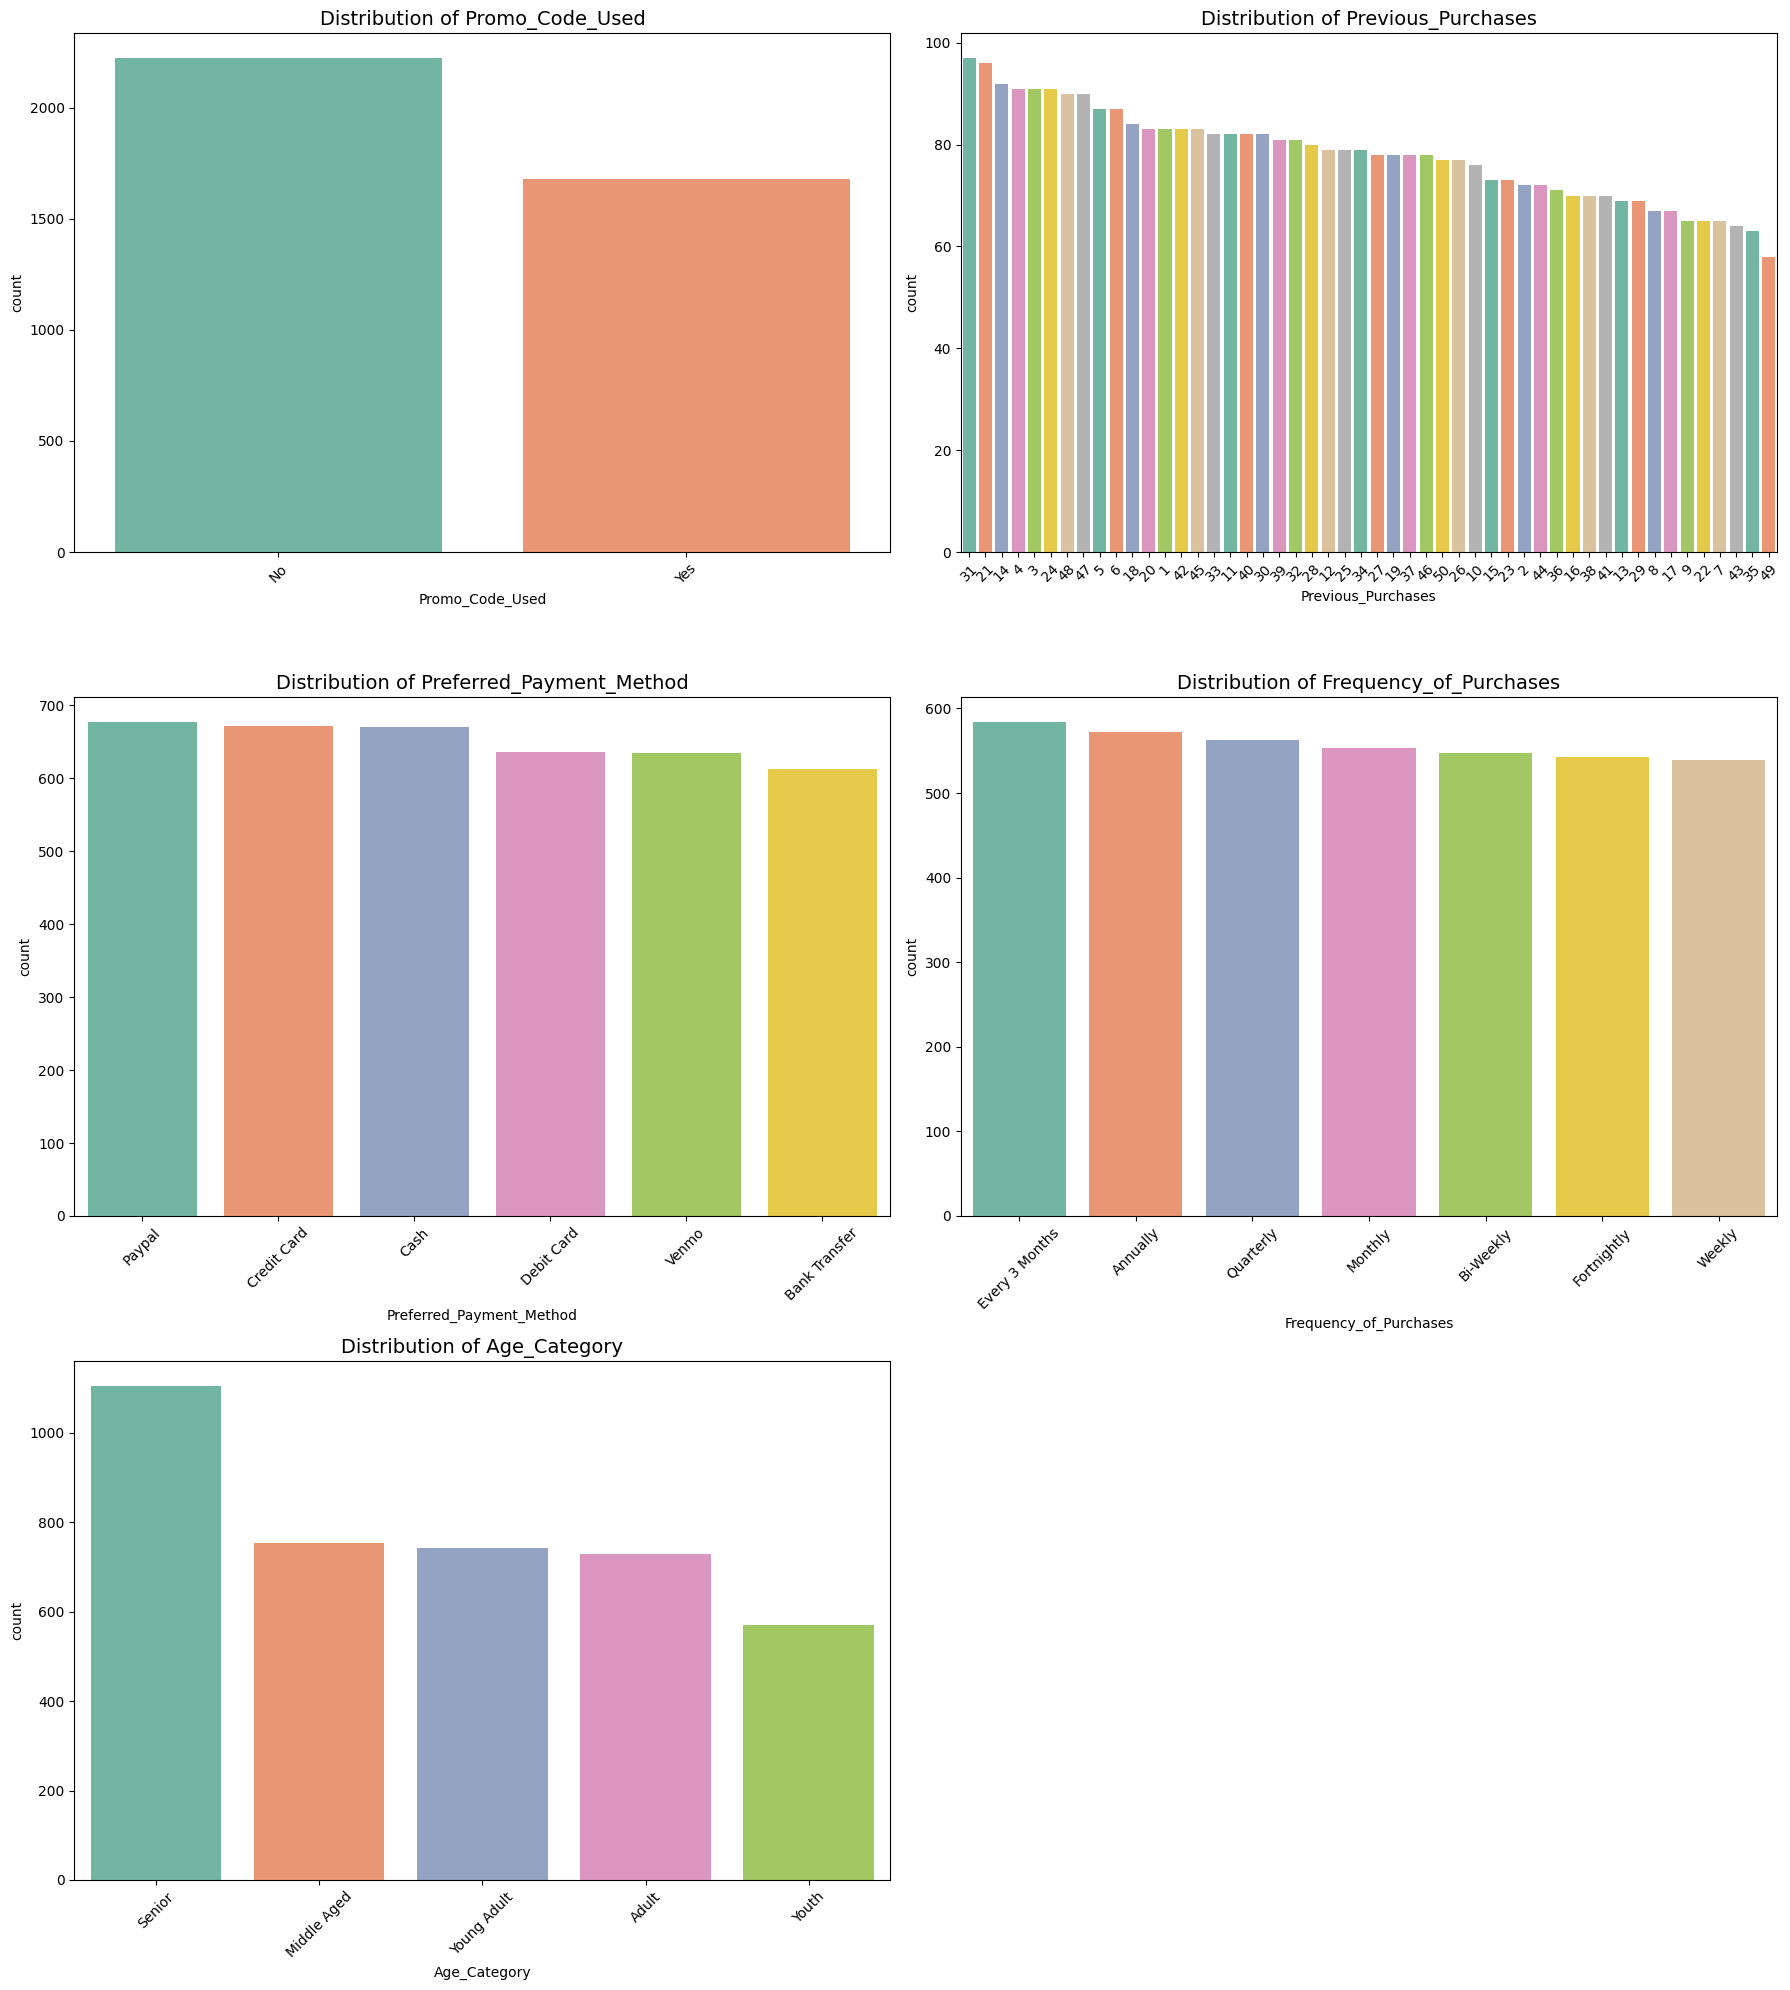

In [41]:


columns = ['Promo_Code_Used', 'Previous_Purchases', 'Preferred_Payment_Method', 
           'Frequency_of_Purchases', 'Age_Category']

plt.figure(figsize=(18, 20))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [42]:
df['Season'].value_counts()


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [43]:
pd.crosstab(df['Season'], df['Promo_Code_Used'], normalize='index') * 100


Promo_Code_Used,No,Yes
Season,,
Fall,59.282051,40.717949
Spring,55.955956,44.044044
Summer,55.706806,44.293194
Winter,57.054583,42.945417


## Number of Customers per Season

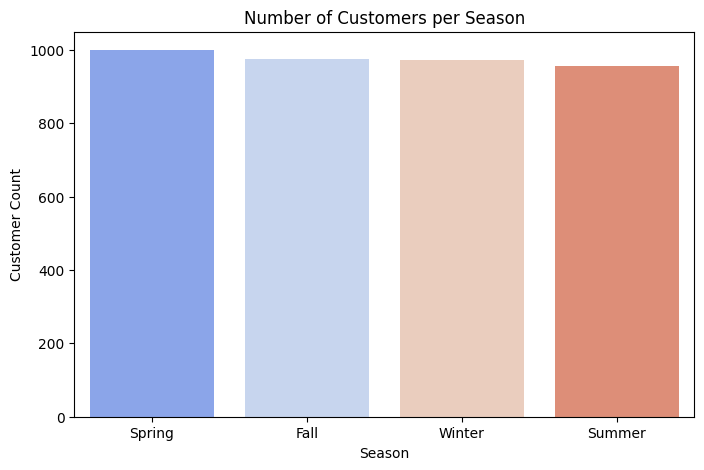

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Season', order=df['Season'].value_counts().index, palette='coolwarm')
plt.title('Number of Customers per Season')
plt.xlabel('Season')
plt.ylabel('Customer Count')
plt.show()

## Promo Code Usage by Season (%) 


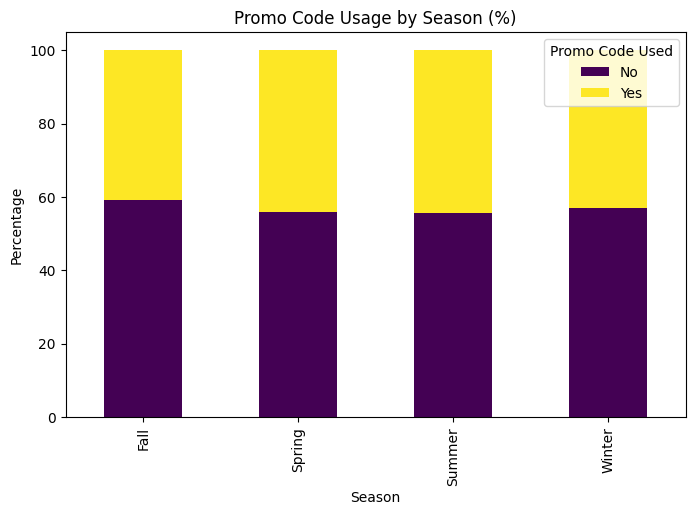

In [45]:
season_promo = pd.crosstab(df['Season'], df['Promo_Code_Used'], normalize='index') * 100
season_promo.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Promo Code Usage by Season (%)')
plt.ylabel('Percentage')
plt.xlabel('Season')
plt.legend(title='Promo Code Used', labels=['No', 'Yes'])
plt.show()


## Product Category Distribution Across Seasons

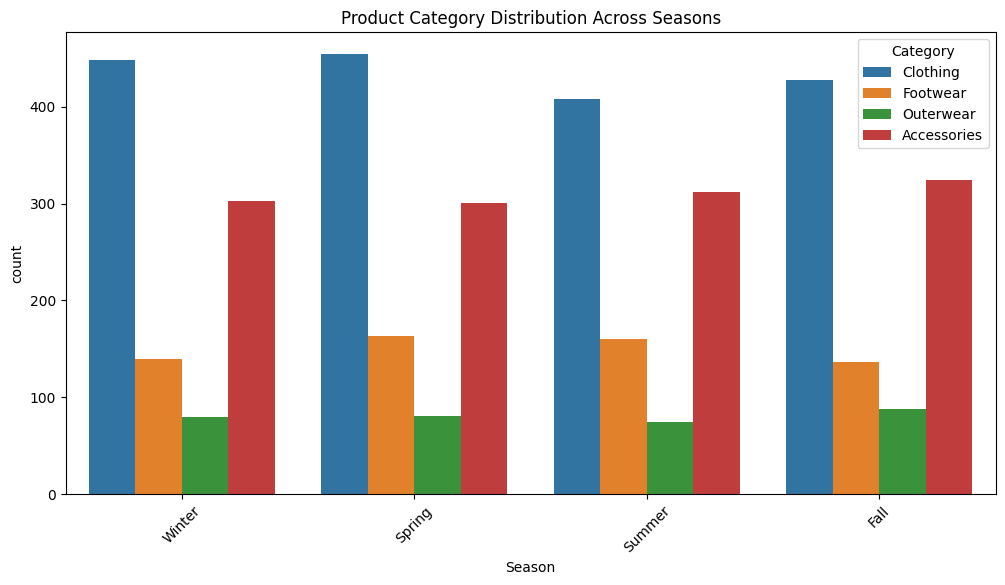

In [46]:



plt.figure(figsize=(12, 6))
sns.countplot(x='Season', hue='Category', data=df)
plt.title('Product Category Distribution Across Seasons')
plt.xticks(rotation=45)
plt.show()




# Export DataFrame to Excel File

In [47]:

df.to_excel('Shopping_Data.xlsx', index=False, engine='openpyxl')
